# SVM(서포트 벡터 머신)
: 분류 오차를 줄이면서 동시에 여백을 최대로 하는 결정 경계를 찾는 이진 분류기

: 다양한 데이터들을 여러 클래스 간에 분리해줄 수 있는 최적의 경계(초평면)를 찾는 것(감독학습 알고리즘)(가장 합리적인 경계를 찾겠다.)

- 특정 데이터 포인트가 두 개 이상의 클래스 중에서 어디에 속하는지 결정하기 위해 사용된다.

1) 경계(초평면) : n차원 공간에서 n-1 차원의 경계를 말한다.
2) 마진 : 두 클래스 간의 경계와 가장 가까운 데이터 포인트(서포트 벡터)들의 거리(해당 부분의 마진을 최대화하는 경계를 찾아야 한다.)
3) 서포트 벡터 : 마진으로부터 가장 가까운 데이터 포인트들

# SVM(서포트 벡터 머신)
: 분류 오차를 줄이면서 동시에 여백을 최대로 하는 결정 경계를 찾는 이진 분류기

: 다양한 데이터들을 여러 클래스 간에 분리해줄 수 있는 최적의 경계(초평면)를 찾는 것(감독학습 알고리즘)(가장 합리적인 경계를 찾겠다.)

- 특정 데이터 포인트가 두 개 이상의 클래스 중에서 어디에 속하는지 결정하기 위해 사용된다.

1) 경계(초평면) : n차원 공간에서 n-1 차원의 경계를 말한다.
2) 마진 : 두 클래스 간의 경계와 가장 가까운 데이터 포인트(서포트 벡터)들의 거리(해당 부분의 마진을 최대화하는 경계를 찾아야 한다.)
3) 서포트 벡터 : 마진으로부터 가장 가까운 데이터 포인트들

## 선형 SVM
: 두 클래스 간의 마진을 최대화하는 경계를 찾는다.(wx + b = 0) (w : 경계의 벡터)

- J(w) = min(1/2 * ||w||)^2
- subject to yi(w*xi +  b) >= 1 (yi : 데이터 포인트, xi : 클래스 레이블)
  
## 비선형 SVM
: 대부분 비선형 문제는 성형 분리가 불가능하므로, 커널 함수를 사용하여 데이터를 고차원으로 매핑한다.(선형 커널, 다항 커널, 가우시안, RBF 커널, 시그모이드 커널)

- 메모리 사용량이 많고, 기준이 명확하지 않은 단점이 있다.

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.datasets import load_iris, make_moons, load_breast_cancer
import numpy as np
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm
from sklearn.model_selection import KFold

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap

matplotlib.rcParams['axes.unicode_minus'] = False

plt.rc('font', family='AppleGothic')

In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X = iris['data'][:, (2, 3)]

scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

data = pd.DataFrame(data=Xstan, columns=['Petal length', 'petal width'])
data['target'] = iris['target']
data = data[data['target']!=2]
data.head()

,Petal length,petal width,target
0,-1.340227,-1.315444,0
1,-1.340227,-1.315444,0
2,-1.397064,-1.315444,0
3,-1.283389,-1.315444,0
4,-1.340227,-1.315444,0


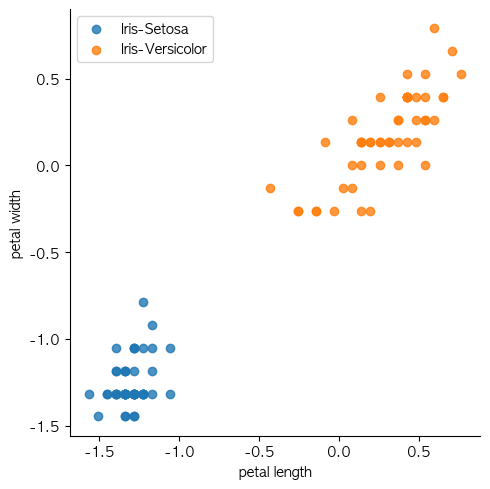

In [4]:
sns.lmplot(x='Petal length', y='petal width', hue='target', data=data, fit_reg=False, legend=False)
plt.legend(['Iris-Setosa', 'Iris-Versicolor'])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [5]:
# C값이 클수록 training error 더 큰 비중(overfit)
# C값이 작을수록 margin 더 큰 비중(underfit)
C = 1000

svc = LinearSVC(C=C, loss='hinge') # C : 규제강도, Loss : 손실함수
svc.fit(data[['Petal length', 'petal width']].values, data['target'].values)

LinearSVC(C=1000, loss='hinge')

In [6]:
w0, w1 = svc.coef_[0] # 가중치 벡터 w를 추출 (w0 : 꽃잎 길이, w1 : 꽃잎 너비)
b = svc.intercept_[0] # 편향 b

In [7]:
x0 = np.linspace(-1.7, 0.7, num=100) # 꽃잎 길이 범위
x1_decision = -b/w1 - w0/w1*x0 # 결정 경계

x1_plus = x1_decision + 1/w1 # 양의 마진
x1_minus = x1_decision - 1/w1 # 음의 마진

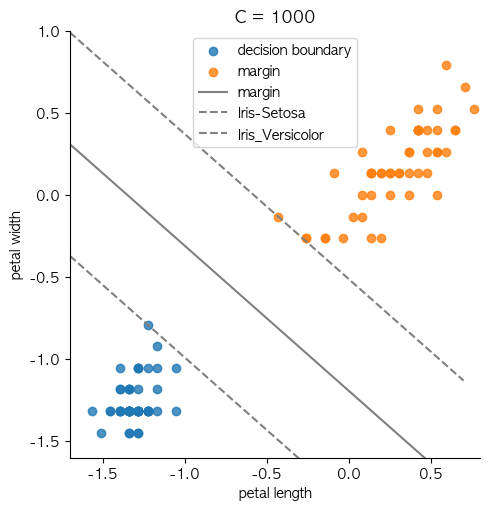

In [8]:
sns.lmplot(x='Petal length', y='petal width', hue='target', data=data, fit_reg=False, legend=False)
plt.plot(x0, x1_decision, color='grey')
plt.plot(x0, x1_plus, x0, x1_minus, color='grey', linestyle='--')
plt.legend(['decision boundary', 'margin', 'margin', 'Iris-Setosa', 'Iris_Versicolor'])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('C = 1000')
plt.ylim(-1.6, 1)
plt.xlim(-1.7, 0.8)
plt.show()

In [9]:
X, y = make_moons(noise=0.1, random_state=42)
data = pd.DataFrame(data = X, columns=['x1', 'x2'])
data['y'] = y
data.head()

,x1,x2,y
0,1.582023,-0.445815,1
1,0.066045,0.439207,1
2,0.736631,-0.398963,1
3,-1.056928,0.242456,0
4,-0.802162,0.202718,0


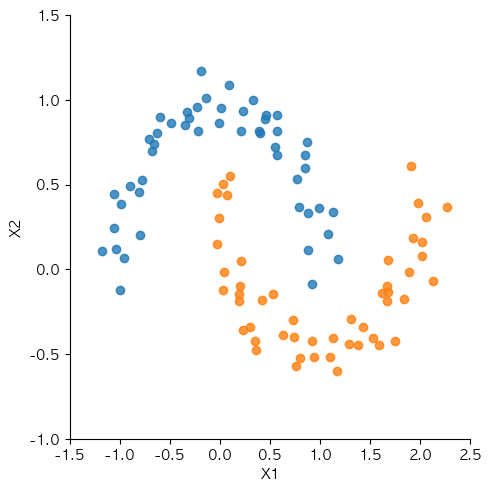

In [10]:
sns.lmplot(x='x1', y='x2', hue='y', data=data, fit_reg=False, legend=False)
plt.xlim(-1.5, 2.5)
plt.ylim(-1, 1.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [11]:
# linear을 추가했을 경우
C = 100

svc = LinearSVC(C=C, loss='hinge') # C : 규제강도, Loss : 손실함수
svc.fit(data[['x1', 'x2']].values, data['y'].values)

LinearSVC(C=100, loss='hinge')

In [12]:
w0, w1 = svc.coef_[0] # 가중치 벡터 w를 추출 (w0 : 꽃잎 길이, w1 : 꽃잎 너비)
b = svc.intercept_[0] # 편향 b

In [13]:
x0 = np.linspace(-1.7, 2.7, num=100)
x1_decision = -b/w1 - w0/w1*x0 # 결정 경계

x1_plus = x1_decision + 1/w1 # 양의 마진
x1_minus = x1_decision - 1/w1 # 음의 마진

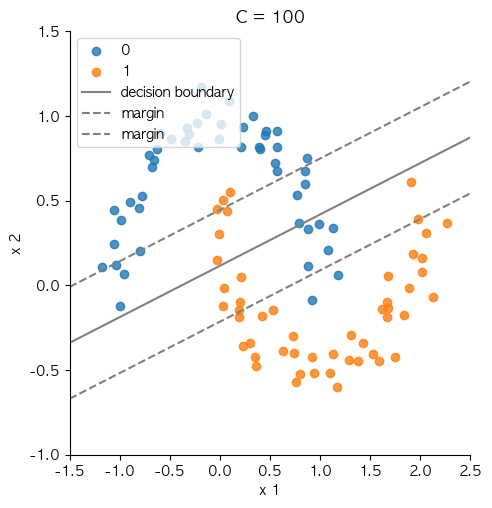

In [14]:
sns.lmplot(x='x1', y='x2', hue='y', data=data, fit_reg=False, legend=False)
plt.plot(x0, x1_decision, color='grey')
plt.plot(x0, x1_plus, x0, x1_minus, color='grey', linestyle='--')
plt.legend(['0', '1', 'decision boundary', 'margin', 'margin'])
plt.xlabel('x 1')
plt.ylabel('x 2')
plt.title('C = 100')
plt.ylim(-1, 1.5)
plt.xlim(-1.5, 2.5)
plt.show()

In [15]:
# 비선형
C = 100
sclaer = StandardScaler()
Xstan = scaler.fit_transform(X)
svm_clf = SVC(kernel='poly', degree=3, C=C, coef0=1) # poly(다항식), degree : 다항식 커널의 차수(2차원->3차원), coef0 : 다항식 커널의 상수항 계수
svm_clf.fit(Xstan, y)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [16]:
X0, X1 = X[:,0], X[:, 1]
xx0, xx1 = make_meshgrid(X0, X1)

xgrid = np.c_[xx0.ravel(), xx1.ravel()] # 메시그리드 데이터 2D 배열 변환
xgridstan = scaler.transform(xgrid) # 메시그리드 표준화

In [17]:
Z = svm_clf.predict(xgridstan)
Z = Z.reshape(xx0.shape)

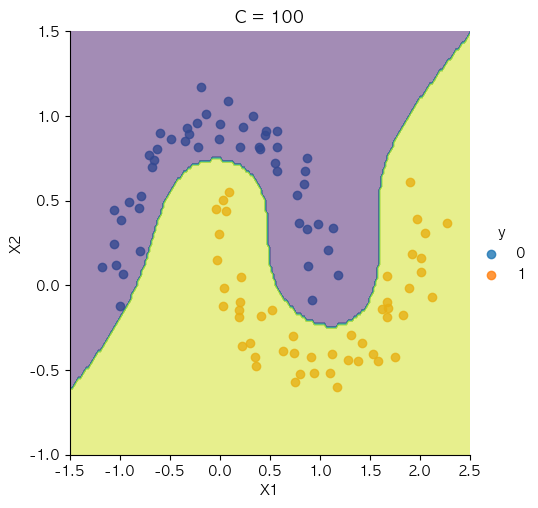

In [18]:
sns.lmplot(x='x1', y='x2', hue='y', data=data, fit_reg=False, legend=True)
plt.contourf(xx0, xx1, Z, alpha=0.5)
plt.xlim(-1.5, 2.5)
plt.ylim(-1, 1.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('C = 100')
plt.show()

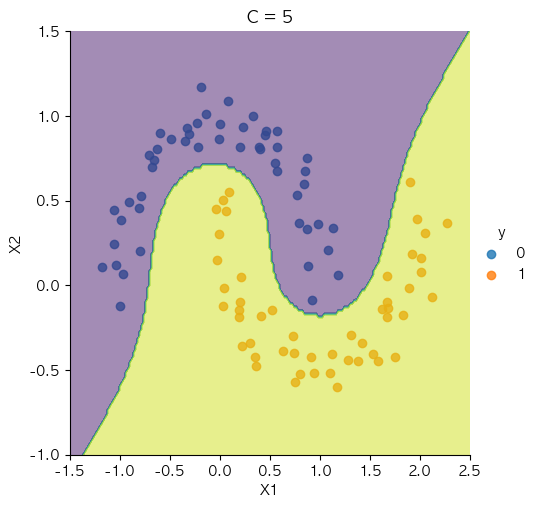

In [19]:
C = 5
sclaer = StandardScaler()
Xstan = scaler.fit_transform(X)
svm_clf = SVC(kernel='poly', degree=3, C=C, coef0=1) # poly(다항식), degree : 다항식 커널의 차수(2차원->3차원), coef0 : 다항식 커널의 상수항 계수
svm_clf.fit(Xstan, y)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

X0, X1 = X[:,0], X[:, 1]
xx0, xx1 = make_meshgrid(X0, X1)

xgrid = np.c_[xx0.ravel(), xx1.ravel()] # 메시그리드 데이터 2D 배열 변환
xgridstan = scaler.transform(xgrid) # 메시그리드 표준화

Z = svm_clf.predict(xgridstan)
Z = Z.reshape(xx0.shape)

sns.lmplot(x='x1', y='x2', hue='y', data=data, fit_reg=False, legend=True)
plt.contourf(xx0, xx1, Z, alpha=0.5)
plt.xlim(-1.5, 2.5)
plt.ylim(-1, 1.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('C = 5')
plt.show()

In [20]:
C = 5
gamma = 0.5
scaler = StandardScaler()
Xstan = scaler.fit_transform(X)
# RBF kernel(Gaussian 커널) 무한 차원의 공간으로 변환 - 더 복잡한 경계면을 학습할 수 있다.
# 데이터 포인트 간의 거리에 따른 가우시안 함수를 사용한다.
# 감마 - 커널의 너비를 정한다. 감마값이 크면 너비가 좁아져 모델이 과적합될 수 있고, 작으면 너비가 넓어져 과소적합의 위험성이 있다.
svm_clf = SVC(kernel='rbf', gamma=gamma, C=C)
svm_clf.fit(Xstan, y)

SVC(C=5, gamma=0.5)

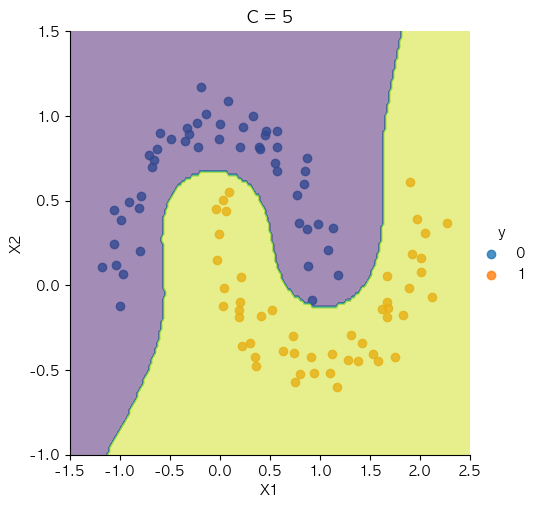

In [21]:
X0, X1 = X[:,0], X[:, 1]
xx0, xx1 = make_meshgrid(X0, X1)

xgrid = np.c_[xx0.ravel(), xx1.ravel()] # 메시그리드 데이터 2D 배열 변환
xgridstan = scaler.transform(xgrid) # 메시그리드 표준화

Z = svm_clf.predict(xgridstan)
Z = Z.reshape(xx0.shape)

sns.lmplot(x='x1', y='x2', hue='y', data=data, fit_reg=False, legend=True)
plt.contourf(xx0, xx1, Z, alpha=0.5)
plt.xlim(-1.5, 2.5)
plt.ylim(-1, 1.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('C = 5')
plt.show()

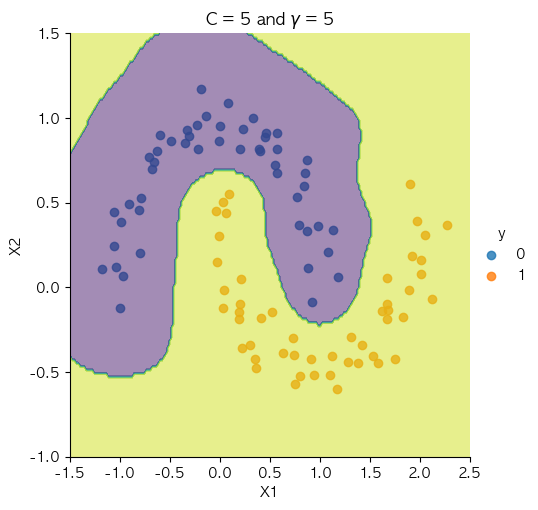

In [22]:
C = 5
gamma = 5
scaler = StandardScaler()
Xstan = scaler.fit_transform(X)
# RBF kernel(Gaussian 커널) 무한 차원의 공간으로 변환 - 더 복잡한 경계면을 학습할 수 있다.
# 데이터 포인트 간의 거리에 따른 가우시안 함수를 사용한다.
# 감마 - 커널의 너비를 정한다. 감마값이 크면 너비가 좁아져 모델이 과적합될 수 있고, 작으면 너비가 넓어져 과소적합의 위험성이 있다.
svm_clf = SVC(kernel='rbf', gamma=gamma, C=C)
svm_clf.fit(Xstan, y)

X0, X1 = X[:,0], X[:, 1]
xx0, xx1 = make_meshgrid(X0, X1)

xgrid = np.c_[xx0.ravel(), xx1.ravel()] # 메시그리드 데이터 2D 배열 변환
xgridstan = scaler.transform(xgrid) # 메시그리드 표준화

Z = svm_clf.predict(xgridstan)
Z = Z.reshape(xx0.shape)

sns.lmplot(x='x1', y='x2', hue='y', data=data, fit_reg=False, legend=True)
plt.contourf(xx0, xx1, Z, alpha=0.5)
plt.xlim(-1.5, 2.5)
plt.ylim(-1, 1.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title(f'C = {C} and $\gamma$ = {gamma}')
plt.show()

In [23]:
C = 5
gamma = 'auto'
scaler = StandardScaler()
Xstan = scaler.fit_transform(X)
# 시그모이드 커널 : 0과 1사이의 확률값
# gamma, coef0 매개변수
# 학습이 더디게 진행될 수 있다.(미분값이 작아지는 구간)
# 데이터 특성에 따라 성능이 크게 달라진다.
svm_clf = SVC(kernel='sigmoid', gamma=gamma, C=C)
svm_clf.fit(Xstan, y)

SVC(C=5, gamma='auto', kernel='sigmoid')

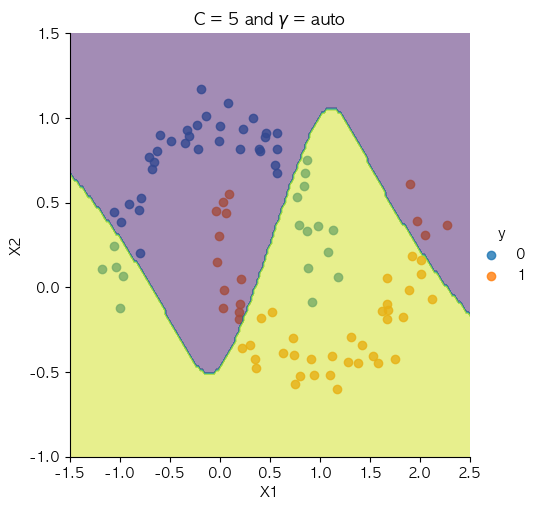

In [24]:
X0, X1 = X[:,0], X[:, 1]
xx0, xx1 = make_meshgrid(X0, X1)

xgrid = np.c_[xx0.ravel(), xx1.ravel()] # 메시그리드 데이터 2D 배열 변환
xgridstan = scaler.transform(xgrid) # 메시그리드 표준화

Z = svm_clf.predict(xgridstan)
Z = Z.reshape(xx0.shape)

sns.lmplot(x='x1', y='x2', hue='y', data=data, fit_reg=False, legend=True)
plt.contourf(xx0, xx1, Z, alpha=0.5)
plt.xlim(-1.5, 2.5)
plt.ylim(-1, 1.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title(f'C = {C} and $\gamma$ = {gamma}')
plt.show()

In [25]:
# Multi-class Classification
iris = load_iris()
X = iris['data'][:, (2, 3)]

scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

data = pd.DataFrame(data=Xstan, columns=['petal length', 'petal width'])
data['target'] = iris['target']
data.head()

,petal length,petal width,target
0,-1.340227,-1.315444,0
1,-1.340227,-1.315444,0
2,-1.397064,-1.315444,0
3,-1.283389,-1.315444,0
4,-1.340227,-1.315444,0


In [26]:
X = iris.data[:, :2]
y = iris.target

In [27]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [28]:
C = 1.0
models = (SVC(kernel='linear', C=C),
          SVC(kernel='rbf', gamma=0.7, C=C),
          SVC(kernel='poly', degree=3, gamma='auto', C=C),
          SVC(kernel='sigmoid', C=C))

models = (clf.fit(X, y) for clf in models)

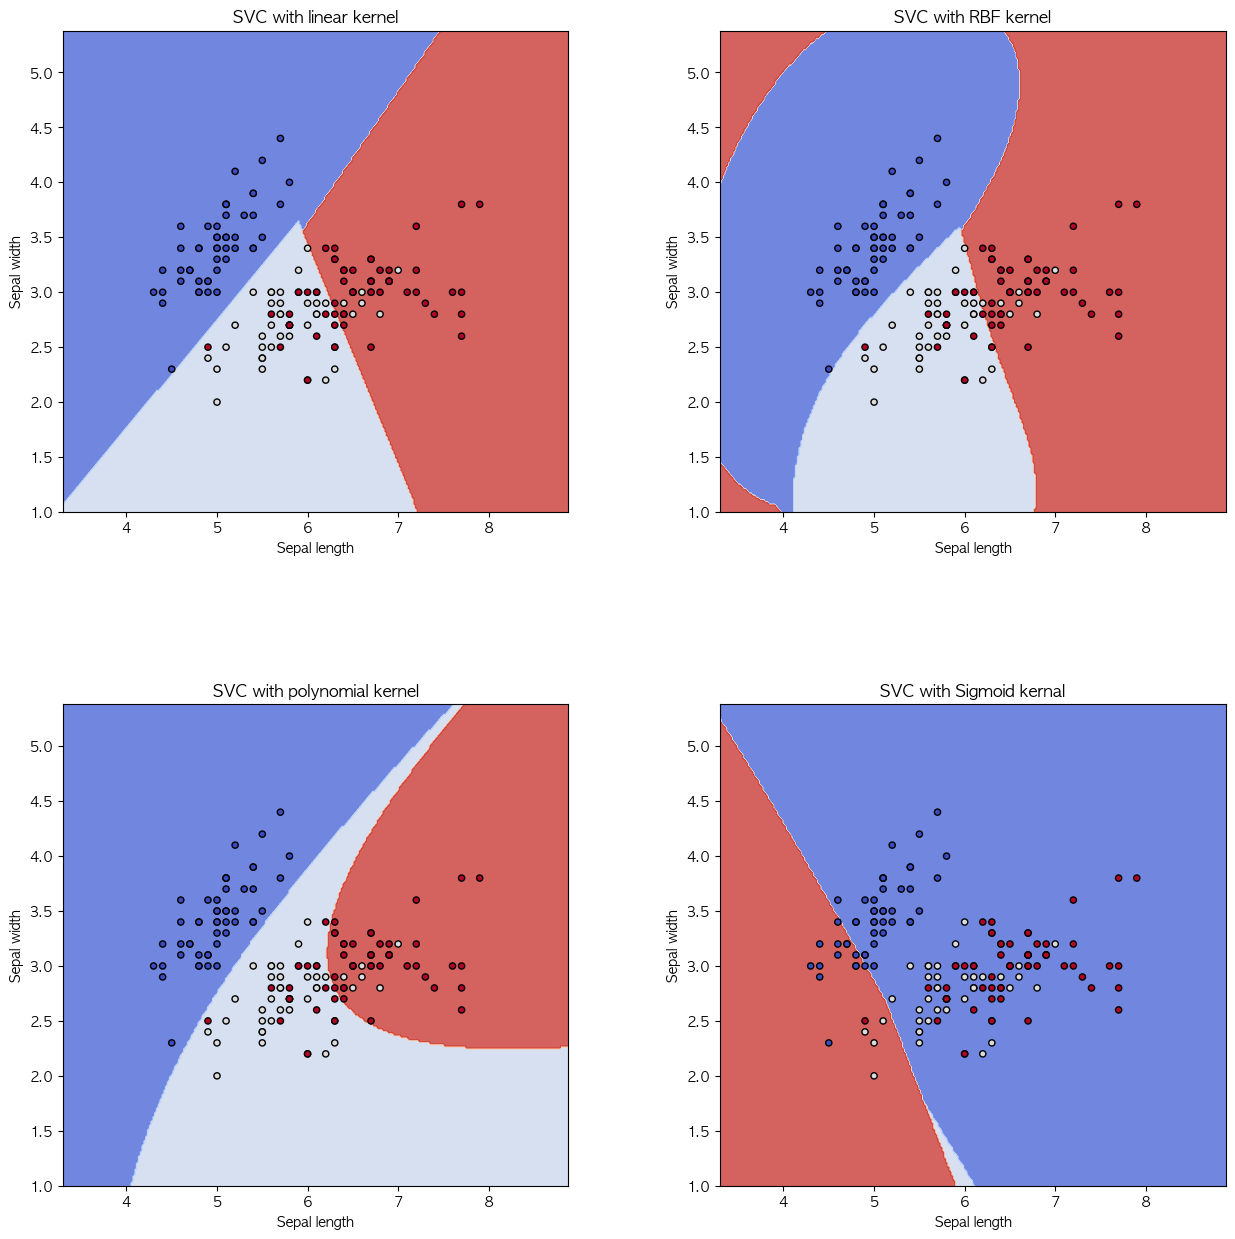

In [29]:
fig, sub = plt.subplots(2, 2, figsize=(15, 15))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

titles = ('SVC with linear kernel', 'SVC with RBF kernel', 'SVC with polynomial kernel', 'SVC with Sigmoid kernal')

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_title(title)

plt.show()

In [30]:
breast_cancer = load_breast_cancer()

In [31]:
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.DataFrame(breast_cancer.target, columns=['diagnosis'])

In [32]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
y['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

print(X_train.shape, X_test.shape)

(381, 30) (188, 30)


In [36]:
svc = SVC(random_state=42)
param_grid=[{'kernel' : ['linear'], 'C':[0.1, 1, 10, 100, 100]},
            {'kernel' : ['poly'], 'degree':[2, 3, 5], 'C':[0.1, 1, 10, 100, 1000]},
            {'kernel' : ['rbf'], 'gamma':['auto', 'scale'], 'C':[0.1, 1, 10, 100, 1000]}, # auto : 특성 개수(1/features_num)
            {'kernel' : ['sigmoid'], 'gamma':['auto','scale'],'C':[0.1, 1, 10, 100, 1000]}] # scale : 분산(1/features_num * X.var())

scores = ['precision', 'recall']

for score in scores:
    print('# Tuning huper-parameters for %s\n' % score)

    CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, scoring=f'{score}_macro', cv=10, verbose=1)
    CV_svc.fit(X_train, y_train)

    print('Best Parameters set : ', CV_svc.best_params_)

    y_true, y_pred = y_test, CV_svc.predict(X_test)
    print(classification_report(y_true, y_pred))
    

# Tuning huper-parameters for precision

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best Parameters set :  {'C': 0.1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.98      0.98      0.98       121

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188

# Tuning huper-parameters for recall

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best Parameters set :  {'C': 0.1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.98      0.98      0.98       121

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



In [37]:
# 위 데이터를 가지고 학습을 진행한다.(유방암 데이터)
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=10, verbose=1)
CV_svc.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10, estimator=SVC(random_state=42),
             param_grid=[{'C': [0.1, 1, 10, 100, 100], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 5],
                          'kernel': ['poly']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': ['auto', 'scale'], 'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': ['auto', 'scale'], 'kernel': ['sigmoid']}],
             verbose=1)

In [38]:
best_svc = CV_svc.best_estimator_
best_svc.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', random_state=42)

In [39]:
y_pred = best_svc.predict(X_train)
acc = accuracy_score(y_train, y_pred)
print(f'Train acc : {acc:0.4f}')

Train acc : 0.9843


In [40]:
y_pred = best_svc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Test acc : {acc:0.4f}')

Test acc : 0.9787


In [41]:
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'정확도 : {acc:0.4f}, 민감도 : {recall:0.4f}, 정밀도 : {precision:0.4f}')

정확도 : 0.9787, 민감도 : 0.9835, 정밀도 : 0.9835


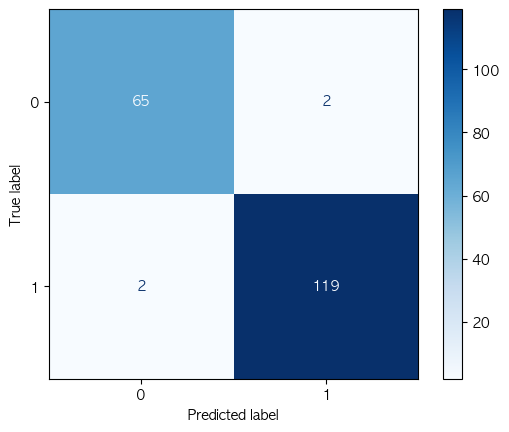

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

ConfusionMatrixDisplay.from_estimator(best_svc, X_test, y_test, cmap=plt.cm.Blues)
plt.show()